# Agrupamiento en Hierarchical Clustering

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [7]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

El dataset "Mall Customer Segmentation" contiene información de clientes de un centro comercial, como ID, género, edad, ingreso anual y puntaje de gasto, con el objetivo de segmentarlos en grupos homogéneos para diseñar estrategias de marketing personalizadas y eficaces.

In [8]:
# Cargar el conjunto de datos en la variable data
data = pd.read_csv(r"C:\UNAD\SEMESTRE 7\ANALISIS DE DATOS\TAREA 4\Anexo 5 - Dataset Mall Customer Segmentation\Mall_Customers.csv")

In [17]:
# Realizamos lectura de los Datos para el análisis exploratorio
data.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


El dataset Mall Customer Segmentation contiene los siguientes datos: CustomerID: identificador único para cada cliente. Gender: género del cliente (Male o Female). Age: edad del cliente en años. Annual Income (k$): ingreso anual del cliente en miles de dólares. Spending Score (1-100): puntuación asignada según el comportamiento y los hábitos de gasto del cliente. Estas variables permiten segmentar a los clientes en grupos homogéneos para diseñar estrategias de marketing específicas.

In [19]:
# Descripción de los datos
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
# Obtener información sobre el tipo de datos y el total de valores en cada columna
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


El resultado de data.info() muestra que el dataset tiene 200 filas y 5 columnas, todas con datos no nulos. Las columnas son: CustomerID (números enteros), Gender (texto), Age (números enteros), Annual Income (k$) (números enteros), y Spending Score (1-100) (números enteros). Los tipos de datos son adecuados y no hay valores faltantes. El dataset ocupa 7.9 KB de memoria.

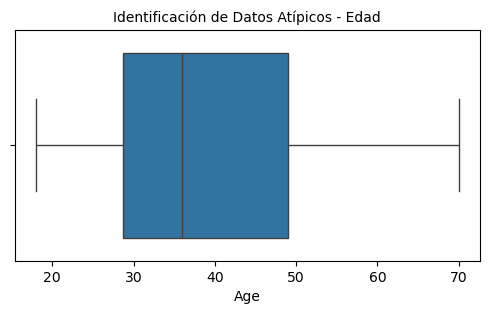

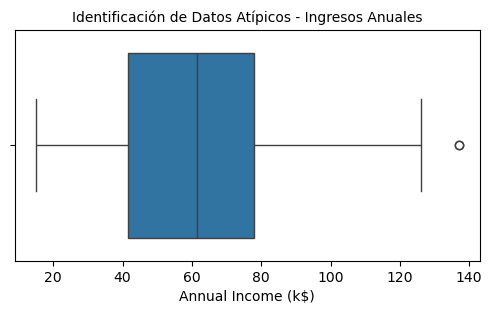

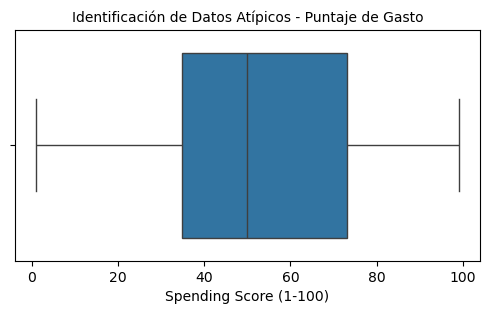

In [27]:
#Identificación de Datos Faltantes y Atípicos
# Boxplot para Age
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age'])
plt.title('Identificación de Datos Atípicos - Edad', fontsize=10)
plt.show()

# Boxplot para Annual Income (k$)
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Annual Income (k$)'])
plt.title('Identificación de Datos Atípicos - Ingresos Anuales', fontsize=10)
plt.show()

# Boxplot para Spending Score (1-100)
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos - Puntaje de Gasto', fontsize=10)
plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [30]:
# Identificar columnas con datos faltantes
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [32]:
# Revisión de datos faltantes

# Cantidad de registros con cero en Edad
print("Cantidad de Registros con cero en Edad: ", data['Age'].isin([0]).sum())

# Cantidad de registros con cero en Salario Anual
print("Cantidad de Registros con cero en Salario Anual: ", data['Annual Income (k$)'].isin([0]).sum())

# Cantidad de registros con cero en Puntaje de Gasto
print("Cantidad de Registros con cero en Puntaje de Gasto: ", data['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Salario Anual:  0
Cantidad de Registros con cero en Puntaje de Gasto:  0


In [34]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

# Reemplazar ceros en la columna Edad con el valor medio de Edad
data['Age'] = data['Age'].replace(0, data['Age'].mean())

# Reemplazar ceros en la columna Salario Anual con el valor medio de Salario Anual
data['Annual Income (k$)'] = data['Annual Income (k$)'].replace(0, data['Annual Income (k$)'].mean())

# Reemplazar ceros en la columna Puntaje de Gasto con el valor medio de Puntaje de Gasto
data['Spending Score (1-100)'] = data['Spending Score (1-100)'].replace(0, data['Spending Score (1-100)'].mean())

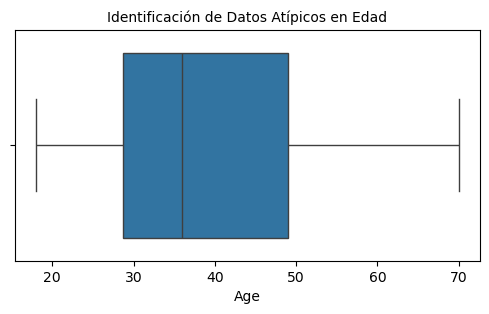

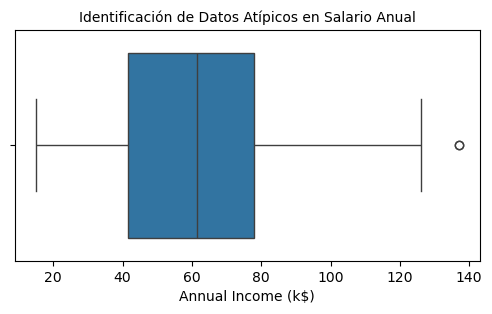

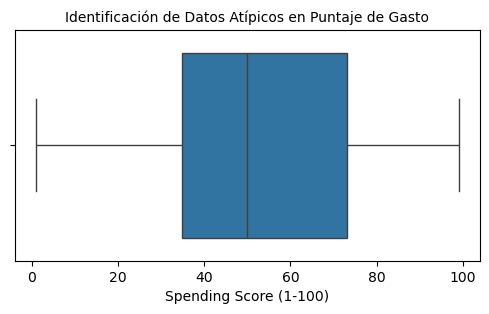

In [36]:
# Identificación de Datos Atípicos

# Boxplot para la variable Edad (Age)
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age'])
plt.title('Identificación de Datos Atípicos en Edad', fontsize=10)
plt.show()

# Boxplot para la variable Salario Anual (Annual Income)
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Annual Income (k$)'])
plt.title('Identificación de Datos Atípicos en Salario Anual', fontsize=10)
plt.show()

# Boxplot para la variable Puntaje de Gasto (Spending Score)
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos en Puntaje de Gasto', fontsize=10)
plt.show()

In [13]:
# Definir los niveles mínimo y máximo ajustados para las variables
nivel_minimo_age = 18  # Edad mínima 
nivel_maximo_age = 100  # Edad máxima 

nivel_minimo_income = 15  # Salario mínimo en miles de dólares (15k)
nivel_maximo_income = 137  # Salario máximo en miles de dólares (200k)

nivel_minimo_spending = 1  # Puntaje mínimo de gasto
nivel_maximo_spending = 100  # Puntaje máximo de gasto

# Conteo de Datos Atípicos para Edad
Total_Atipicos_age = ((data['Age'] < nivel_minimo_age) | (data['Age'] > nivel_maximo_age)).sum()
print("El total de datos atípicos en Edad es {}".format(Total_Atipicos_age))

# Conteo de Datos Atípicos para Salario Anual
Total_Atipicos_income = ((data['Annual Income (k$)'] < nivel_minimo_income) | 
                         (data['Annual Income (k$)'] > nivel_maximo_income)).sum()
print("El total de datos atípicos en Salario Anual es {}".format(Total_Atipicos_income))

# Conteo de Datos Atípicos para Puntaje de Gasto
Total_Atipicos_spending = ((data['Spending Score (1-100)'] < nivel_minimo_spending) | 
                           (data['Spending Score (1-100)'] > nivel_maximo_spending)).sum()
print("El total de datos atípicos en Puntaje de Gasto es {}".format(Total_Atipicos_spending))

El total de datos atípicos en Edad es 0
El total de datos atípicos en Salario Anual es 0
El total de datos atípicos en Puntaje de Gasto es 0


In [15]:
# Filtrar los datos para todas las variables según los niveles mínimos y máximos ajustados
data_filtrada = data[
    (data['Age'] >= nivel_minimo_age) & (data['Age'] <= nivel_maximo_age) &
    (data['Annual Income (k$)'] >= nivel_minimo_income) & (data['Annual Income (k$)'] <= nivel_maximo_income) &
    (data['Spending Score (1-100)'] >= nivel_minimo_spending) & (data['Spending Score (1-100)'] <= nivel_maximo_spending)
]

In [17]:
#Revisión del tipo de datos y datos faltantes
data_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Características de Interés para el Agrupamiento

- Annual Income (k$):
  * Es el ingreso anual del cliente, y es importante porque nos ayuda a identificar qué tan alto es su poder adquisitivo.
  * Por ejemplo, con esta información podemos agrupar clientes según si ganan poco, normal o mucho dinero.

- Spending Score (1-100):
  * Este puntaje indica qué tanto gasta un cliente en el mall.
  * Sirve para saber si son compradores frecuentes y leales, o si compran poco.

- Age:
  * La edad es clave porque diferentes grupos de edad (jóvenes, adultos, mayores) tienen comportamientos distintos al momento de gastar.
  * Nos puede ayudar a ver si ciertas edades gastan más o menos.

- Gender:
  * Aunque no siempre es la más importante, es útil para saber si hay diferencias entre hombres y mujeres al momento de comprar.
  * Nos permite analizar si algunos productos o estrategias de marketing funcionan mejor para un género que para otro.

In [22]:
# Filtrar columnas del modelo
Datos = data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [27]:
# Revisión de los datos de las variables objetivo
Datos.head(40)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


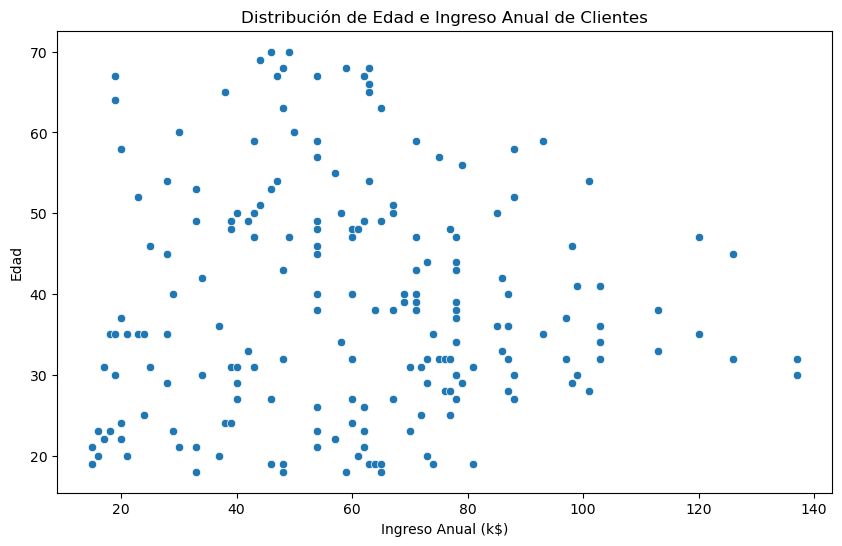

In [24]:
# Grafica antes del agrupamiento
# Graficar Edad vs Ingreso Anual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Datos['Annual Income (k$)'], y=Datos['Age'])
plt.title('Distribución de Edad e Ingreso Anual de Clientes')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Edad')
plt.show()

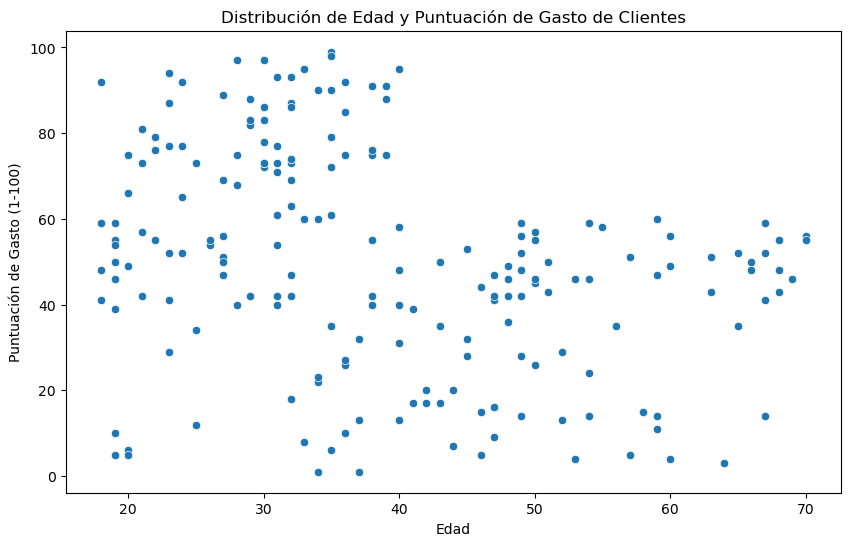

In [26]:
# Grafica antes del agrupamiento
# Graficar Spending Score vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Datos['Age'], y=Datos['Spending Score (1-100)'])
plt.title('Distribución de Edad y Puntuación de Gasto de Clientes')
plt.xlabel('Edad')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.show()

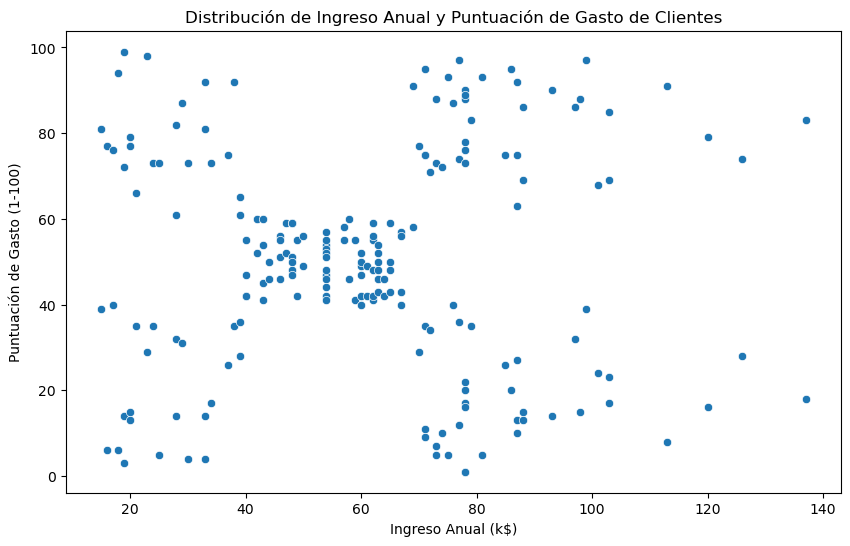

In [28]:
# Grafica antes del agrupamiento
# Graficar Spending Score vs Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Datos['Annual Income (k$)'], y=Datos['Spending Score (1-100)'])
plt.title('Distribución de Ingreso Anual y Puntuación de Gasto de Clientes')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparámetros

In [40]:
# Estandarizar los datos usando StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [42]:
# Verificar si existen valores no finitos en los datos escalados y manejarlos
scaled_data = np.nan_to_num(scaled_data)  # Reemplaza NaN, inf y -inf con valores finitos

In [44]:
# Continua con hierarchical clustering
linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

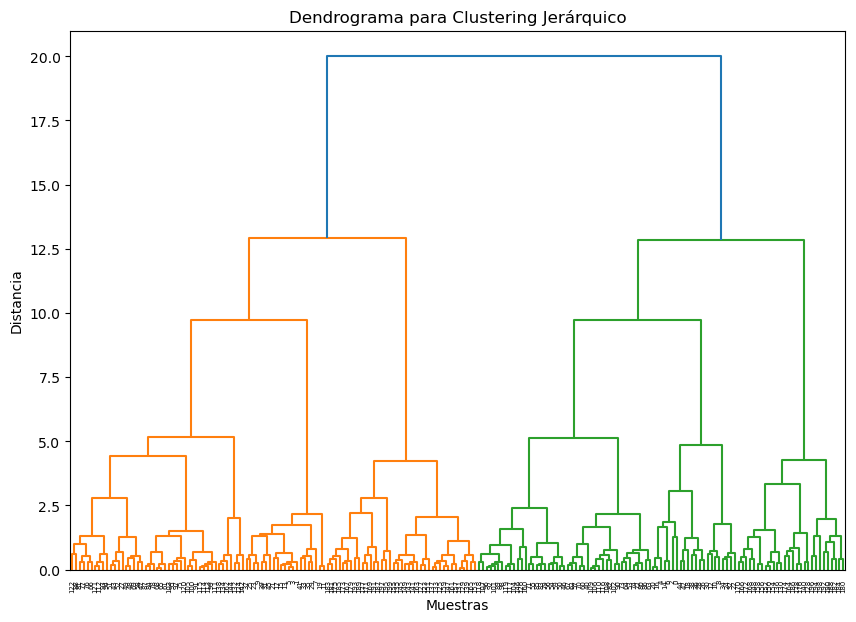

In [46]:
# Visualizar el dendrograma para ver cómo se agruparán los datos
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

En este gráfico, cada unión representa la combinación de dos clústeres o muestras según su nivel de similitud. Las ramas largas muestran que los grupos fusionados tienen mayor diferencia entre sí, mientras que las ramas cortas indican que los elementos agrupados son más parecidos. Para decidir cuántos clústeres conservar, se puede hacer un corte horizontal en el dendrograma, observando las distancias en el eje Y.

* Interpretación:
  
- Ingreso anual (Annual Income (k$):
Los clientes con ingresos parecidos tienden a agruparse en ramas más cortas. Por ejemplo, aquellos con ingresos altos probablemente se agrupan separados de los que tienen ingresos bajos, lo que demuestra que esta variable influye mucho en la segmentación. El dendrograma podría mostrar divisiones claras según los ingresos, reflejando diferencias en hábitos y comportamientos de gastoaridad.

- Edad (Age):
En el dendrograma, los clientes que tienen edades similares suelen unirse más rápido. Esto indica que la edad es un factor importante en el comportamiento, ya que las personas de la misma generación tienden a compartir intereses y patrones de compra parecidos.

- Puntaje de gasto (Spending Score (1-100):
Esta variable mide cuánto gastan los clientes y con qué frecuencia compran. En el dendrograma, es posible identificar grupos diferenciados, como clientes con altos puntajes que son compradores más frecuentes, y aquellos con puntajes bajos, que probablemente compran menos o con menos regularidad.

* Observaciones del dendrograma:
  
- Corte óptimo:
Viendo el dendrograma, parece que al cortar en una distancia de aproximadamente 15-20 en el eje Y se identifican dos grupos principales. Sin embargo, si se hace un corte más bajo, estos grupos podrían dividirse en subgrupos más pequeños con características más específicas.

- Grupos principales:

    * Grupo 1: Podría estar formado por clientes con altos ingresos y puntajes de gasto elevados, que serían ideales para promociones exclusivas o productos premium.
    * Grupo 2: Este grupo probablemente incluye a clientes con ingresos más bajos y menor actividad de gasto, donde las estrategias deberían enfocarse en promociones o descuentos para atraer su atención.

- Ramas largas:
Las ramas más largas en el dendrograma indican que los grupos que se fusionan en estos puntos tienen diferencias importantes, como clientes muy frecuentes frente a compradores ocasionales. Esto permite identificar segmentos con necesidades muy diferentes.

In [60]:
# Asumiendo que 'Datos' es tu DataFrame con las columnas seleccionadas
# Reemplazar valores NaN por la media de cada columna
Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].fillna(
    Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
)

# Preprocesamiento de los datos (escalado)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.32148866683112387
Índice de Calinski-Harabasz: 88.10174149244529
Índice de Davies-Bouldin: 1.1277290061047862


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

* ### Gráfico de Dispersión para Visualización de Clusters

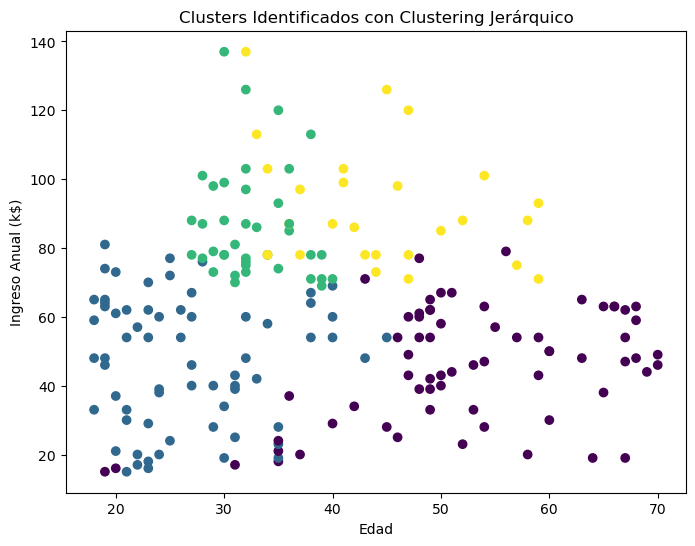

In [67]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=4)  # Ajustar el número de clusters
Datos['Cluster'] = model.fit_predict(scaled_data)

# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(Datos['Age'], Datos['Annual Income (k$)'], c=Datos['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.show()

El gráfico muestra cómo los clientes se agrupan en diferentes clústeres según su edad y ingreso anual (en miles de dólares). Cada color representa un clúster distinto, lo que indica que los clientes dentro de un mismo clúster tienen características similares en estas dos variables. Esto permite identificar patrones de comportamiento y segmentar a los clientes de acuerdo con sus características económicas y demográficas.

* ### Gráfico de Silueta

Score de Silueta: 0.3614512741691407


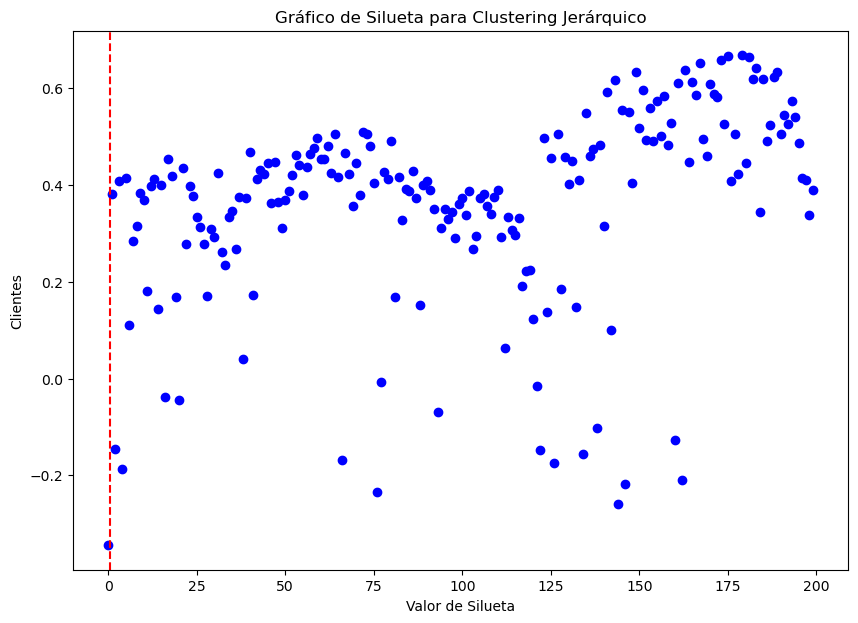

In [71]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Score de Silueta: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Clientes")
plt.show()

El gráfico de silueta, con un promedio de 0.361, refleja una calidad moderada en la agrupación de los datos realizada por el clustering jerárquico. La mayoría de los puntos tienen valores positivos, lo que indica que están bien asignados a sus respectivos clusters. Sin embargo, algunos puntos con valores negativos podrían estar ubicados en los límites entre clusters, lo que sugiere una menor cohesión o que podrían estar mal clasificados. En general, el modelo muestra un desempeño razonable al identificar patrones en los datos.

## 7. Interpretar, analizar y documentar los resultados obtenidos

La edad e ingresos de los clientes pueden influir significativamente en sus patrones y preferencias de consumo. Por ejemplo, clientes de mayor edad podrían tener prioridades diferentes en comparación con clientes más jóvenes, mientras que los ingresos pueden determinar la categoría de productos o servicios que prefieren.

En el gráfico de silueta, la mayoría de los valores son positivos y están agrupados cerca de 0.4, lo que indica que los puntos están correctamente asignados a sus clusters en general, aunque algunos valores cercanos a 0 e incluso negativos muestran que ciertos puntos están en los límites de los clusters o podrían estar asignados incorrectamente. Un coeficiente de silueta de 0.321 sugiere que los clusters tienen una separación moderada y que dentro de cada cluster los puntos están algo agrupados, aunque existe una leve superposición entre los clusters.

El índice de Calinski-Harabasz, con un valor de 88.10, indica que los clusters tienen una compacidad aceptable y están razonablemente separados. Si bien no es un valor excepcionalmente alto, sugiere que el modelo ha logrado identificar grupos con cierta coherencia interna y diferenciación entre ellos. Por otro lado, el índice de Davies-Bouldin de 1.127 señala que los clusters tienen una buena separación relativa y que los datos dentro de cada grupo son consistentes. Este valor refuerza que los clusters son útiles para segmentar y analizar a los clientes.

En conclusión, los resultados obtenidos reflejan una segmentación adecuada de los clientes según las variables analizadas, permitiendo identificar patrones útiles para análisis y estrategias futuras.

